In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore


#### Data Understanding and exploration

#### A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable.

In [2]:
df=pd.read_csv('car.csv')

In [3]:
df

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino
...,...
393,ford mustang gl
394,vw pickup
395,dodge rampage
396,ford ranger


#### B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable.

In [4]:
df_json = pd.read_json('car.json')

In [5]:
df_json

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


#### C. Merge both the DataFrames together to form a single DataFrame 

In [6]:
 car=pd.concat([df,df_json],axis=1)

In [7]:
car

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79,2625,18.6,82,1


In [8]:
car.shape

(398, 9)

In [9]:
car.head(5)

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


#### D. Print 5 point summary of the numerical features and share insights

In [10]:
car.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [11]:
#### there are 398 rows of data
#### we can see all the five figures of corresponding attributes of car as above count, max valeus, min values and 

#### 2. Data Preparation & Analysis: 

#### A. Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach. [2 Mark]

In [12]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [13]:
percent_missing = car.isnull().sum() * 100 / len(car)
missing_value_df = pd.DataFrame({'column_name': car.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
car_name,car_name,0.0
mpg,mpg,0.0
cyl,cyl,0.0
disp,disp,0.0
hp,hp,0.0
wt,wt,0.0
acc,acc,0.0
yr,yr,0.0
origin,origin,0.0


#### there are 0 percent of data that are missing here

B. Check for duplicate values in the data and impute with the best suitable approach.

In [14]:
bool_series = car.duplicated(keep='first')
bool_series

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Length: 398, dtype: bool

#### None of the values are true which means there is no duplicate data in data set

#### C. Plot a pairplot for all features.

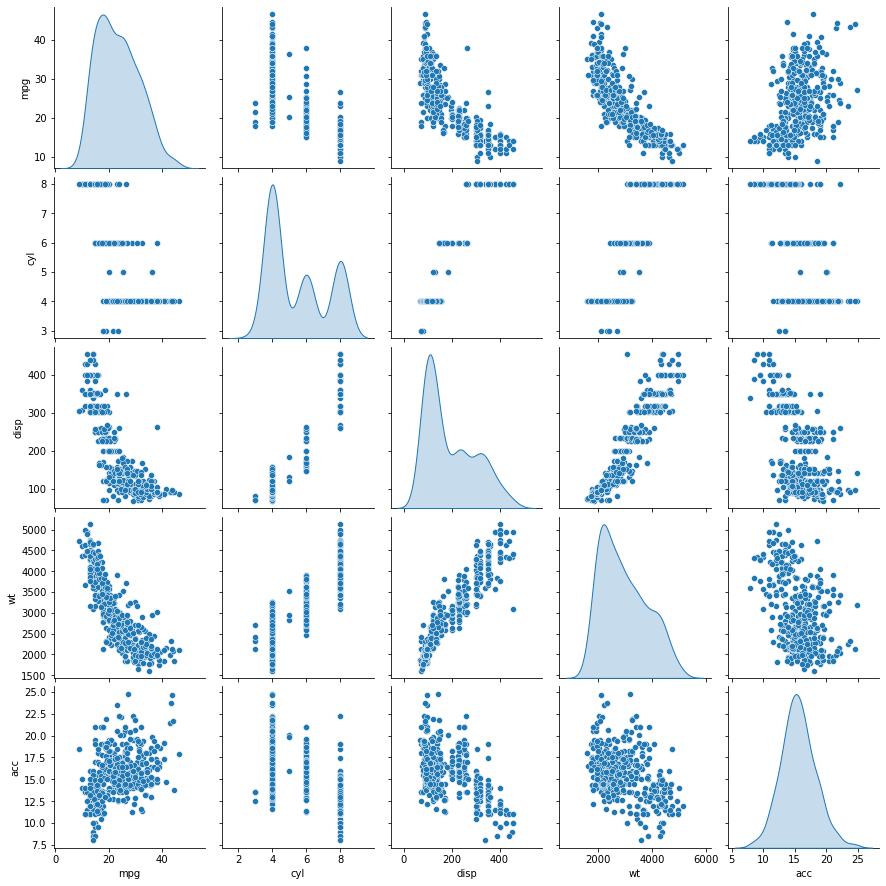

In [15]:
#pair plot for the numeric attributes
car_attr = car.iloc[:, 0:7]
sns.pairplot(car_attr, diag_kind='kde');

#### D. Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’. [

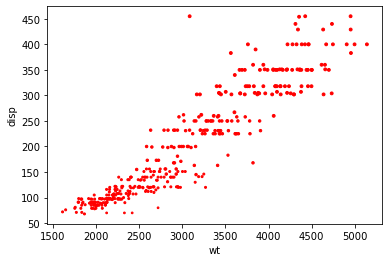

In [16]:
car.plot.scatter(x = 'wt', y = 'disp', s = 'cyl',c = 'red');

#### E. Share insights for Q2.d. 

In [17]:
print('displacement is directly proportion to wt as wt increases , displacement is also increasing')

displacement is directly proportion to wt as wt increases , displacement is also increasing


#### F. Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’.

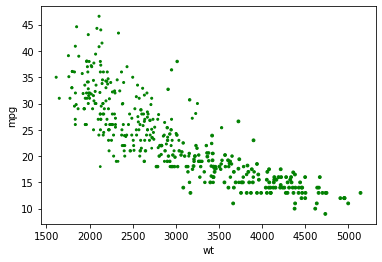

In [18]:
car.plot.scatter(x = 'wt', y = 'mpg', s = 'cyl',c = 'green');

#### G. Share insights for Q2.f

In [19]:
print('mpg is inversely proportion to wt as wt increases , mpg is decreasing')

mpg is inversely proportion to wt as wt increases , mpg is decreasing


#### H. Check for unexpected values in all the features and datapoints with such values

In [20]:
print(car['hp'].unique())

[130 165 150 140 198 220 215 225 190 170 160 95 97 85 88 46 87 90 113 200
 210 193 '?' 100 105 175 153 180 110 72 86 70 76 65 69 60 80 54 208 155
 112 92 145 137 158 167 94 107 230 49 75 91 122 67 83 78 52 61 93 148 129
 96 71 98 115 53 81 79 120 152 102 108 68 58 149 89 63 48 66 139 103 125
 133 138 135 142 77 62 132 84 64 74 116 82]


#### we can see hp column has ? values which need to be replace by Nan of hp column data

In [21]:
# Replace missing values with NaN
car = car.replace('?', np.nan)
#car[hpIsDigit['hp'] == False] 

In [22]:
print(car['wt'].unique())

[3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 3563 3609 3761 3086
 2372 2833 2774 2587 2130 1835 2672 2430 2375 2234 2648 4615 4376 4382
 4732 2264 2228 2046 2634 3439 3329 3302 3288 4209 4464 4154 4096 4955
 4746 5140 2962 2408 3282 3139 2220 2123 2074 2065 1773 1613 1834 1955
 2278 2126 2254 2226 4274 4385 4135 4129 3672 4633 4502 4456 4422 2330
 3892 4098 4294 4077 2933 2511 2979 2189 2395 2288 2506 2164 2100 4100
 3988 4042 3777 4952 4363 4237 4735 4951 3821 3121 3278 2945 3021 2904
 1950 4997 4906 4654 4499 2789 2279 2401 2379 2124 2310 2472 2265 4082
 4278 1867 2158 2582 2868 3399 2660 2807 3664 3102 2875 2901 3336 2451
 1836 2542 3781 3632 3613 4141 4699 4457 4638 4257 2219 1963 2300 1649
 2003 2125 2108 2246 2489 2391 2000 3264 3459 3432 3158 4668 4440 4498
 4657 3907 3897 3730 3785 3039 3221 3169 2171 2639 2914 2592 2702 2223
 2545 2984 1937 3211 2694 2957 2671 1795 2464 2572 2255 2202 4215 4190
 3962 3233 3353 3012 3085 2035 3651 3574 3645 3193 1825 1990 2155 2565
 3150 

In [23]:
print(car['disp'].unique())

[307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.  108.  155.   68.  114.  156.   76.   83.
  90.  231.  262.  134.  119.  171.  115.  101.  305.   85.  130.  168.
 111.  260.  151.  146.   80.   78.  105.  131.  163.   89.  267.   86.
 183.  141.  173.  135.   81.  100.  145.  112.  181.  144. ]


In [24]:
print(car['cyl'].unique())

[8 4 6 3 5]


In [25]:
print(car['origin'].unique())

[1 3 2]


#### After checking all the attributes it seems only hp attribute has NaN that can be replace by median

In [26]:
#replace hp with median
car['hp'].fillna((car['hp'].median()), inplace=True)

In [27]:
print('The data set has no missing values \n')
car.isnull().sum()

The data set has no missing values 



car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

### 3. Clustering: [15 Marks]

#### A. Apply K-Means clustering for 2 to 10 clusters.

In [28]:
#separating numeric variables
cc = car.iloc[:,0:8] 
cc.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70


In [29]:
#dropping/ignoring car_name 
car = car.drop('car_name', axis=1)

In [30]:
car.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [31]:
#dropping orign also as it is categorical
car = car.drop('origin', axis=1)

In [32]:
car.head()

,mpg,cyl,disp,hp,wt,acc,yr
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [33]:
car_z = car.apply(zscore)
car_z.head()

,mpg,cyl,disp,hp,wt,acc,yr
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


#### B. Plot a visual and find elbow point.

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

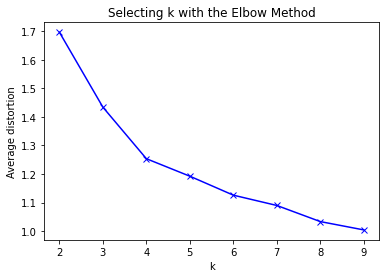

In [34]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(2,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(car_z)
    prediction=model.predict(car_z)
    meanDistortions.append(sum(np.min(cdist(car_z, model.cluster_centers_, 'euclidean'), axis=1)) / car_z.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

#### C. On the above visual, highlight which are the possible Elbow points.

In [35]:
print('possible elbow points are 3 and 4')

possible elbow points are 3 and 4


#### D Train a K-means clustering model once again on the optimal number of clusters

In [36]:
# Let us first start with K = 3
#using 2 centroids for clustering
k_means = KMeans(n_clusters = 3)
k_means.fit(car_z)
labels = k_means.labels_

In [37]:
# Calculating silhouette_score
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(car_z,labels)

0.35314791198988205

In [38]:
# Let us first start with K = 4
#using 2 centroids for clustering
k_means = KMeans(n_clusters = 4)
k_means.fit(car_z)
labels = k_means.labels_

In [39]:
silhouette_score(car_z,labels)

0.3481793333017884

In [40]:
# Let us first start with K = 2
#using 2 centroids for clustering
k_means = KMeans(n_clusters = 2)
k_means.fit(car_z)
labels = k_means.labels_
silhouette_score(car_z,labels)

0.46264452576184095

In [41]:
print('Here silhoute score for K=2 is higher then of 3 and 4 so there will be 2 groups')

Here silhoute score for K=2 is higher then of 3 and 4 so there will be 2 groups


In [42]:
#calculating silhouette score for different centroids
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
}


silhouette_coefficients = []

 # Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(car_z)
    score = silhouette_score(car_z,kmeans.labels_)
    silhouette_coefficients.append(score)
    


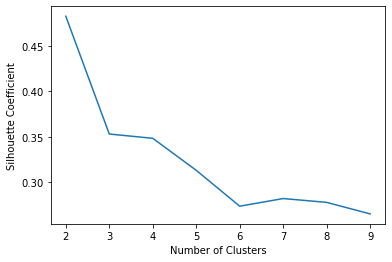

In [43]:
#plotting silhouette score for different centroids
plt.plot(range(2, 10), silhouette_coefficients)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [44]:
#### Calculating WSS for other values of K - Elbow Method
wss =[] 
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(car_z)
    wss.append(KM.inertia_)
wss

[2786.0,
 1294.8418950727319,
 946.0197908553794,
 738.3923281527314,
 665.4397633380624,
 597.2867540207785,
 541.3180240839058,
 497.13623623775004,
 454.0445407411571,
 428.4486877980909]

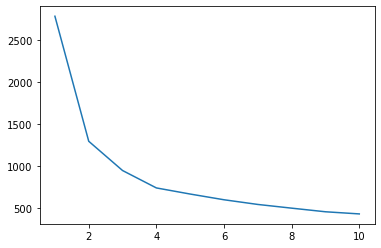

In [45]:
plt.plot(range(1,11), wss)

In [46]:
#attaching the labels to the datasets
car["cluster_K"] = labels
car_z['cluster_K']=labels
Kclus=car
Kclus.head()

,mpg,cyl,disp,hp,wt,acc,yr,cluster_K
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [47]:
#vieweing the distribution of clusters
car.cluster_K.value_counts().sort_index()

0    276
1    122
Name: cluster_K, dtype: int64

#### E Add a new feature in the DataFrame which will have labels based upon cluster value.

In [48]:
#attaching the clsuters to the scaled data
car_z["cluster_K"] = labels
car_z.head(200)

,mpg,cyl,disp,hp,wt,acc,yr,cluster_K
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,1
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,1
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,1
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,1
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,1
...,...,...,...,...,...,...,...,...
195,0.702705,-0.856321,-1.041167,-1.370127,-1.105994,2.407906,-0.002721,0
196,0.126237,-0.856321,-0.916334,-1.160564,-0.953472,2.371599,-0.002721,0
197,0.702705,-0.856321,-0.993154,-0.898609,-1.221864,-0.496725,-0.002721,0
198,1.215121,-0.856321,-0.983552,-1.343932,-1.389757,0.665128,-0.002721,0


In [49]:
#vieweing the distribution of clusters
car_z.cluster_K.value_counts().sort_index()

0    276
1    122
Name: cluster_K, dtype: int64

In [50]:
#aggregating the numerical variable with the clusters formed with the mean
aggdata=car.groupby('cluster_K').mean()
aggdata['Freq']=car.cluster_K.value_counts().sort_index()
aggdata

,mpg,cyl,disp,hp,wt,acc,yr,Freq
cluster_K,,,,,,,,
0,27.156522,4.474638,133.559783,83.865942,2511.485507,16.543841,76.974638,276
1,15.275410,7.672131,328.860656,150.540984,4008.680328,13.360656,73.827869,122


#### F Plot a visual and color the datapoints based upon clusters.

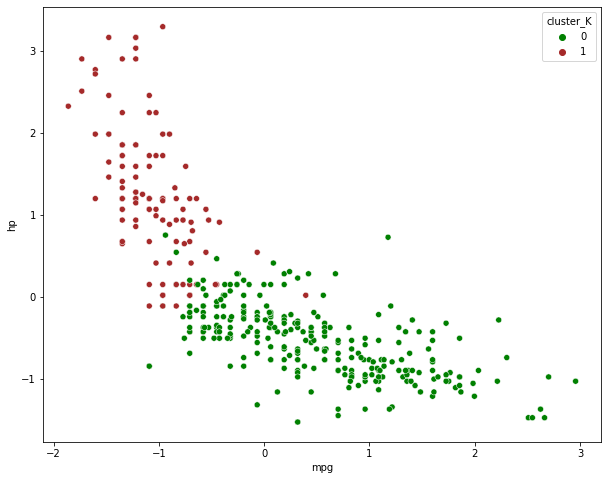

In [51]:
#plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x="mpg", y="hp", hue="cluster_K",
              data=car_z, 
                    palette=['green','brown']);

##### Cluster 0 are with high hp and less mpg

#### cluster 1 classified low hp and higher mpg

array([[<AxesSubplot:title={'center':'acc'}, xlabel='[cluster_K]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[cluster_K]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[cluster_K]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[cluster_K]'>],
       [<AxesSubplot:title={'center':'mpg'}, xlabel='[cluster_K]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[cluster_K]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[cluster_K]'>,
        <AxesSubplot:>]], dtype=object)

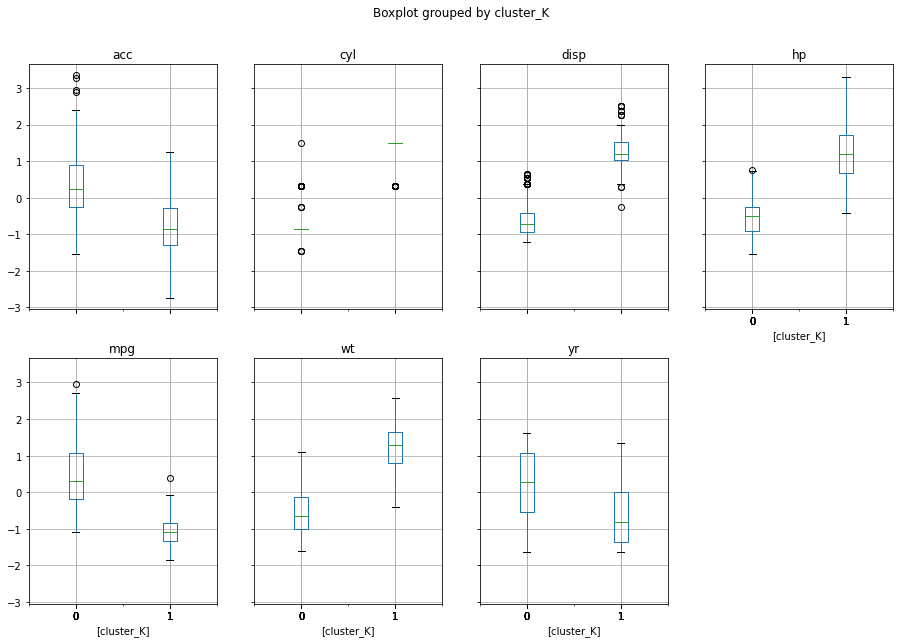

In [52]:
car_z.boxplot(by='cluster_K', layout = (2,4),figsize=(15,10))

#### • DOMAIN: Automobile
#### • CONTEXT: The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
#### DATA DESCRIPTION: The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
#### • All the features are numeric i.e. geometric features extracted from the silhouette.
#### • PROJECT OBJECTIVE: Apply dimensionality reduction technique – PCA and train a model and compare relative results.

#### 1. Data Understanding & Cleaning:

#### A. Read ‘vehicle.csv’ and save as DataFrame.

In [53]:
vehicle = pd.read_csv('Vehicle.csv')

In [54]:
vehicle

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car


In [55]:
vehicle.shape

(846, 19)

#### B. Check percentage of missing values and impute with correct approach.

In [56]:
#Columns having missing values
missing_values_cols=vehicle.columns[vehicle.isnull().any()]
# Number of missing values in each column
vehicle[missing_values_cols].isnull().sum()

circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
dtype: int64

In [57]:
#List all the rows having missing value in any of the single or multiple columns

vehicle[vehicle.isnull().any(axis=1)][missing_values_cols].head()

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2
5,NaN,106.0,172.0,50.0,255.0,26.0,28.0,280.0,957.0,264.0,85.0,5.0,9.0,181.0
9,44.0,98.0,NaN,62.0,183.0,36.0,22.0,202.0,505.0,152.0,64.0,4.0,14.0,195.0
19,56.0,100.0,215.0,NaN,208.0,32.0,24.0,227.0,651.0,223.0,74.0,6.0,5.0,186.0
35,46.0,NaN,172.0,67.0,157.0,43.0,20.0,170.0,363.0,184.0,67.0,17.0,7.0,192.0
66,43.0,68.0,125.0,57.0,149.0,46.0,19.0,169.0,323.0,172.0,NaN,NaN,18.0,179.0


In [58]:
vehicle[vehicle.isnull().any(axis=1)][missing_values_cols].shape

(33, 14)

In [59]:
print('there are 33 values which are missing overll in dataset')

there are 33 values which are missing overll in dataset


In [60]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [61]:
#replace hp with median
for col in missing_values_cols:
    vehicle[col].fillna((vehicle[col].mean()), inplace=True)

In [62]:
vehicle[vehicle.isnull().any(axis=1)][missing_values_cols].head()

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2


In [63]:
vehicle[vehicle.isnull().any(axis=1)][missing_values_cols].shape

(0, 14)

#### As we can see after imputing missing value data with median there is no missing data now

In [64]:
vehicle

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car


#### C. Visualize a Pie-chart and print percentage of values for variable ‘class’. 

In [65]:
vehicle['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

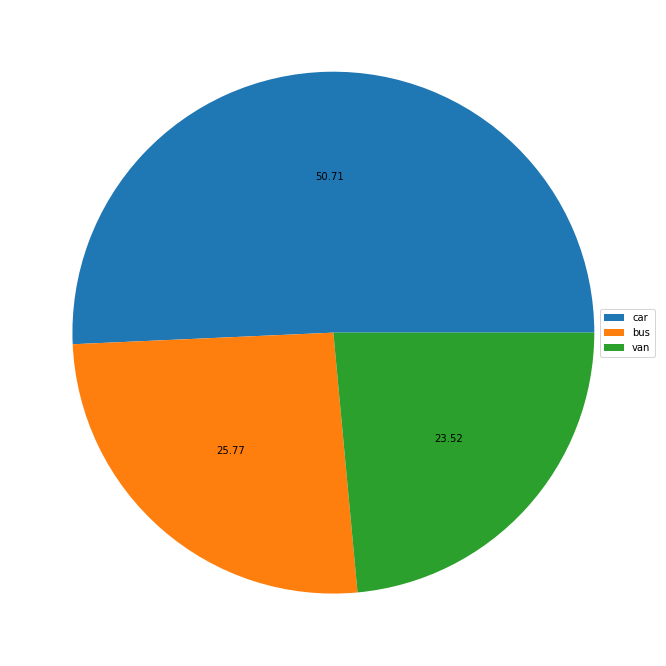

In [66]:
def autopct(pct): # only show the label when it's > 10%
    return ('%.2f' % pct) if pct > 10 else ''

my_labels = ('car','bus','van')

ax = vehicle['class'].value_counts().plot(kind='pie', figsize=(28,12), autopct=autopct, labels=None)
ax.axes.get_yaxis().set_visible(False)
plt.legend(loc=5, labels=my_labels)

#### D. Check for duplicate rows in the data and impute with correct approach.

In [67]:
bool_series = vehicle.duplicated(keep='first')
bool_series

0      False
1      False
2      False
3      False
4      False
       ...  
841    False
842    False
843    False
844    False
845    False
Length: 846, dtype: bool

#### there are no duplicate values in data set as none of the value is true

#### 2. Data Preparation:

#### A. Split data into X and Y. [Train and Test optional]

In [68]:
#Split into Train -Test set
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random number seeding for reapeatability of the code
df_train, df_test= train_test_split(vehicle)
df_train.shape, df_test.shape

((634, 19), (212, 19))

In [69]:
X_train=df_train.drop(labels='class', axis=1)
y_train=df_train['class']
X_test=df_test.drop(labels='class', axis=1)
y_test=df_test['class']
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((634, 18), (634,), (212, 18), (212,))

#### B. Standardize the Data

In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [71]:
sc.fit(X_train) # Fit scaler in train set

StandardScaler()

In [72]:
# transform train set
#Transform X_train
X_train_std=sc.transform(X_train)
#Transform X_test ( with same fit as train) to prevent data leak
X_test_std=sc.transform(X_test)

In [73]:
X_train_std,X_test_std

(array([[-0.11660769, -0.79838926, -0.58923821, ..., -1.4039212 ,
         -0.35520533, -1.10903691],
        [ 0.72623423,  0.98832566,  0.41935075, ..., -0.63713469,
          0.61833892, -0.42757791],
        [-0.47782566, -0.14867474, -0.65227502, ..., -0.96575748,
          1.10511105,  0.93534011],
        ...,
        [-1.07985561, -0.79838926, -0.46316459, ...,  0.34873368,
         -1.16649221, -1.24532871],
        [ 0.0037983 ,  0.82589703,  0.1041667 , ..., -0.74667562,
         -1.16649221, -0.70016151],
        [ 1.68948215,  1.47561155,  1.68008696, ...,  1.11552019,
         -0.03069058,  0.6627565 ]]),
 array([[ 1.44867017,  1.96289744,  1.55401334, ...,  1.99184763,
         -1.49100696, -1.65420412],
        [ 0.48542226, -1.12324652, -0.77834864, ...,  0.02011089,
         -0.51746271, -1.51791232],
        [-1.32066759, -0.79838926, -1.84997442, ..., -0.63713469,
         -2.14003647, -1.79049592],
        ...,
        [ 1.56907616,  1.96289744,  1.49097653, ...,  

#### 3. Model Building:

#### A. Train a base Classification model using SVM.

In [74]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train_std, y_train)

prediction = svc_model.predict(X_test_std)

In [75]:
# check the accuracy on the training set
print(svc_model.score(X_train_std, y_train))
print(svc_model.score(X_test_std, y_test))

0.943217665615142
0.8962264150943396


#### B. Print Classification metrics for train data. 

In [76]:
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[60  8  2]
 [ 4 87  2]
 [ 2  4 43]]


#### C. Apply PCA on the data with 10 components.

In [77]:
from sklearn.decomposition import PCA
  
pca = PCA(n_components=10)
pca.fit(X_train_std)

PCA(n_components=10)

In [78]:
print(pca.explained_variance_)

[9.43126989 3.00922138 1.94278914 1.22063582 0.8895297  0.51123393
 0.33723736 0.20582981 0.16882939 0.0964447 ]


In [79]:
print(pca.components_)

[[ 2.74365682e-01  2.94511963e-01  3.05231429e-01  2.67243501e-01
   7.34144070e-02  9.55549423e-02  3.16578296e-01 -3.13781632e-01
   3.13856136e-01  2.82721179e-01  3.09843767e-01  3.14567611e-01
   2.72650220e-01 -3.07884469e-02  5.07926215e-02  4.46678164e-02
   2.76758508e-02  7.86110730e-02]
 [-1.38201855e-01  1.22377830e-01 -6.62479387e-02 -1.70000275e-01
  -7.29753253e-02  7.83660262e-02  4.32451866e-02  1.40571717e-02
   5.43143304e-02  1.13958735e-01  6.22168838e-02  4.63633098e-02
   2.00361182e-01  5.07619161e-01 -7.80896099e-02 -1.10376253e-01
  -5.42426532e-01 -5.35550417e-01]
 [-1.07232778e-01 -4.37922217e-02 -4.84169607e-02  2.94842587e-01
   6.53132199e-01  5.85729880e-01 -9.12022355e-02  4.58614290e-02
  -1.01903809e-01 -3.56348341e-02  5.13127810e-02 -1.01334651e-01
  -5.53340990e-02  2.36763878e-01 -1.48091229e-01 -4.81605019e-02
   5.56402739e-02  7.87624033e-02]
 [-8.58693928e-02 -1.83598846e-01  7.88085957e-02  3.44667707e-02
  -5.41712619e-02 -5.49584812e-02  1.

In [80]:
print(pca.explained_variance_ratio_)

[0.523133   0.16691528 0.10776249 0.06770614 0.04934037 0.02835709
 0.01870586 0.01141695 0.00936462 0.00534959]


#### D. Visualize Cumulative Variance Explained with Number of Components. 

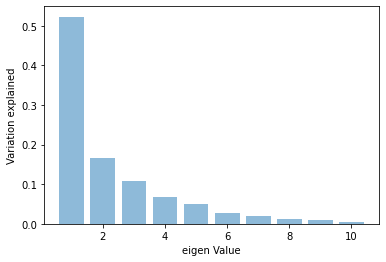

In [81]:
plt.bar(list(range(1,11)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

In [82]:
# Covariance Matrix
cov_matrix = np.cov(X_train_std.T)

print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00157978  0.690088    0.79067399  0.69327154  0.07413624  0.13115883
   0.80820992 -0.78505823  0.81023973  0.67415155  0.75605374  0.81344182
   0.59038297 -0.28684336  0.28833417  0.11144845  0.29036204  0.38541622]
 [ 0.690088    1.00157978  0.80376203  0.62397069  0.13481189  0.2558214
   0.85363621 -0.82656874  0.85104759  0.96421013  0.80758494  0.84716978
   0.92896339  0.03115827  0.17494318 -0.04676479 -0.10621896  0.05939615]
 [ 0.79067399  0.80376203  1.00157978  0.76488962  0.13563536  0.24715641
   0.90989478 -0.91493325  0.8999864   0.78094843  0.87388     0.89543031
   0.71937547 -0.23798094  0.13912406  0.22596933  0.1287872   0.33507516]
 [ 0.69327154  0.62397069  0.76488962  1.00157978  0.64694241  0.4441335
   0.73966944 -0.79427411  0.7147342   0.56834746  0.79869885  0.72894322
   0.54116024 -0.20352759  0.06409781  0.13531898  0.36981975  0.4691265 ]
 [ 0.07413624  0.13481189  0.13563536  0.64694241  1.00157978  0.66534427
   0.09173038 

In [83]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 2.74365682e-01 -1.38201855e-01 -1.07232778e-01 -8.58693928e-02
   8.80223277e-02  1.63555283e-01  4.57332711e-01 -5.99207598e-01
   4.14992698e-01  2.81021708e-01 -5.52607406e-02  2.51635512e-02
   1.43138652e-01 -1.70161870e-03  6.79957104e-02  2.36583416e-03
  -6.35429016e-02 -3.56464472e-03]
 [ 2.94511963e-01  1.22377830e-01 -4.37922217e-02 -1.83598846e-01
  -7.52274508e-02 -3.09653741e-01 -2.35164313e-01 -1.67218667e-01
   1.15667366e-02 -1.03380695e-01 -5.89149648e-03  2.03881295e-01
  -2.95233792e-02  6.37148450e-03 -4.13463037e-01  6.99267334e-02
  -5.15701934e-01  4.27463845e-01]
 [ 3.05231429e-01 -6.62479387e-02 -4.84169607e-02  7.88085957e-02
   3.42979211e-02 -1.23582453e-01  7.96141044e-02  4.45600713e-01
   2.01034019e-01  2.37163644e-01 -6.90347711e-01 -7.67034688e-03
  -2.62174875e-01 -4.61100467e-03  1.09369419e-01 -3.79717468e-02
   1.46470806e-02  1.29875187e-01]
 [ 2.67243501e-01 -1.70000275e-01  2.94842587e-01  3.44667707e-02
  -4.38695064e-02  

In [84]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 52.31330041  69.00482805  79.78107694  86.551691    91.48572801
  94.32143673  96.19202248  97.33371781  98.27017947  98.80513827
  99.15952647  99.40355938  99.59519151  99.73076905  99.83470435
  99.93011393  99.98385425 100.        ]


####  E. Draw a horizontal line on the above plot to highlight the threshold of 90%

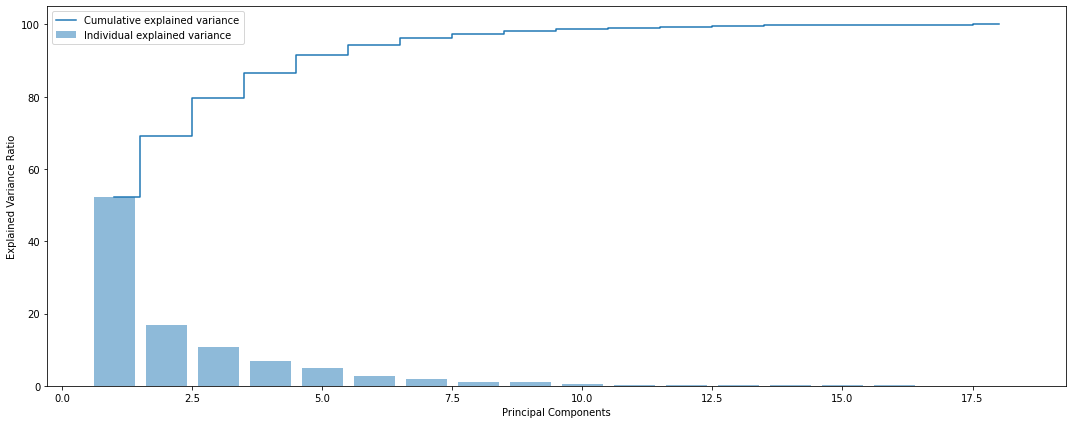

In [85]:
# Ploting 
plt.figure(figsize=(15 , 6))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

#### first 10 principle components explained 95% of data

#### F. Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained. 

In [86]:
pca3 = PCA(n_components=8)
pca3.fit(X_train_std)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(X_train_std)


[[ 0.27436568  0.29451196  0.30523143  0.2672435   0.07341441  0.09555494
   0.3165783  -0.31378163  0.31385614  0.28272118  0.30984377  0.31456761
   0.27265022 -0.03078845  0.05079262  0.04466782  0.02767585  0.07861107]
 [-0.13820185  0.12237783 -0.06624794 -0.17000027 -0.07297533  0.07836603
   0.04324519  0.01405717  0.05431433  0.11395874  0.06221688  0.04636331
   0.20036118  0.50761916 -0.07808961 -0.11037625 -0.54242653 -0.53555042]
 [-0.10723278 -0.04379222 -0.04841696  0.29484259  0.6531322   0.58572988
  -0.09120224  0.04586143 -0.10190381 -0.03563483  0.05131278 -0.10133465
  -0.0553341   0.23676388 -0.14809123 -0.0481605   0.05564027  0.0787624 ]
 [-0.08586939 -0.18359885  0.0788086   0.03446677 -0.05417126 -0.05495848
   0.10447598 -0.09262254  0.10082979 -0.17904552  0.12111268  0.09980954
  -0.19818073  0.04567827 -0.5728141   0.69164161 -0.10359679 -0.02524592]
 [ 0.08802233 -0.07522745  0.03429792 -0.04386951 -0.02605115  0.23004495
  -0.02234757  0.08607993 -0.00383

#### G. Train SVM model on components selected from above step.

In [87]:
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eig_vals[index], eig_vecs[index]) for index in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue by default take first field for sorting
eig_pairs.sort(reverse=True)


# Note: always form pair of eigen vector and values  first before sorting...

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eig_vals))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eig_vals))]

In [88]:
P_reduce = np.array(eigvectors_sorted[0:8]).transpose()   # Selecting first 8 eigen vector out if 18

Proj_train_data = np.dot(X_train_std,P_reduce)   # projecting training data onto the eight eigen vectors

Proj_test_data = np.dot(X_test_std,P_reduce)    # projecting test data onto the eight eigen vectors

#Check shapes of train and test new feature and target set after PCA
Proj_train_data.shape,y_train.shape,Proj_test_data.shape,y_test.shape

((634, 8), (634,), (212, 8), (212,))

In [89]:
# Use SVM

# Use SVM

from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(Proj_train_data, y_train)

prediction = svc_model.predict(Proj_test_data)

#### H. Print Classification metrics for train data of above model and share insights.

In [90]:
# check the accuracy on the training set
print(svc_model.score(Proj_train_data, y_train))
print(svc_model.score(Proj_test_data, y_test))

0.7949526813880127
0.75


In [91]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))


Confusion Matrix:
 [[56 11  3]
 [ 9 76 17]
 [ 1 12 27]]


#### 4.Performance Improvement

#### A.Train another SVM on the components out of PCA. Tune the parameters to improve performance.

#### with linear kernel

B.Share best Parameters observed from above step.

#### C. Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with
insights

In [92]:
# Use SVM

from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(Proj_train_data, y_train)

prediction = svc_model.predict(Proj_test_data)

In [93]:
# check the accuracy on the training set
print(svc_model.score(Proj_train_data, y_train))
print(svc_model.score(Proj_test_data, y_test))

0.7949526813880127
0.75


In [94]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[56 11  3]
 [ 9 76 17]
 [ 1 12 27]]


#### With Rbf

In [95]:
# Building a Support Vector Machine on train data
svc_model = SVC(kernel='rbf')
svc_model.fit(Proj_train_data, y_train)

prediction = svc_model.predict(Proj_test_data)

In [96]:
print(svc_model.score(Proj_train_data, y_train))
print(svc_model.score(Proj_test_data, y_test))

0.916403785488959
0.8632075471698113


In [97]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[58  6  3]
 [ 7 86  5]
 [ 1  7 39]]


In [98]:
#### Hyper Parameter Tuning
#With Hyper Parameters Tuning
#2-3,SVM
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn import svm
#making the instance
model=svm.SVC()
#Hyper Parameters Set
params = {'C': [0.01, 0.05, 0.5, 1], 
      #    'gamma':[0.01, 0.02 , 0.03 , 0.04, 0.05],
          'kernel': ['linear','rbf']}
#Making models with hyper parameters sets
gs = GridSearchCV(model, param_grid=params, n_jobs=-1,cv=10)
#Learning
gs.fit(Proj_train_data,y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.5, 1],
                         'kernel': ['linear', 'rbf']})

In [99]:
#The best hyper parameters set
print("Best Hyper Parameters:\n",gs.best_params_)

Best Hyper Parameters:
 {'C': 1, 'kernel': 'rbf'}


In [100]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics 
prediction=gs.predict(Proj_test_data)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,prediction))

Accuracy: 0.8632075471698113
Confusion Matrix:
 [[58  7  1]
 [ 6 86  7]
 [ 3  5 39]]


#### Looking at the confusion matrix, model predicts all the vans correctly through Silhoutte(100%) 55/62 buses are predicted correctly(95 %) 108/138 cars are predicted correctyy(93.5%)

#### Test Accuracy(95.64%) is well in range of 95% confidence interval(86.8% to 99.6%)

### 5. Data Understanding & Cleaning:

#### A.Explain pre-requisite/assumptions of PCA

#### • There must be linearity in the data set, i.e. the variables combine in a linear manner to form the dataset. The variables exhibit relationships among themselves.

#### • PCA assumes that the principal component with high variance must be paid attention and the PCs with lower variance are disregarded as noise. Pearson correlation coefficient framework led to the origin of PCA, and there it was assumed first that the axes with high variance would only be turned into principal components.

#### • All variables should be accessed on the same ratio level of measurement. The most preferred norm is at least 150 observations of the sample set with a ratio measurement of 5:1.

#### • Extreme values that deviate from other data points in any dataset, which are also called outliers, should be less. More number of outliers will represent experimental errors and will degrade your ML model/algorithm.

#### • The feature set must be correlated and the reduced feature set after applying PCA will represent the original data set but in an effective way with fewer dimensions.



#### B. Explain advantages and limitations of PCA.

#### Advantages of PCA

##### 1. Removes Correlated Features

#### 2. Improves Algorithm Performance

#### 3. Reduces Overfitting

#### 4. Improves Visualization


#### Disadvantages of PCA

#### 1. Independent variables become less interpretable:
#### 2. Data standardization is must before PCA
#### 3. information loss